In [2]:
#PicoGreen

#remeber- concentration is in ng/ml !!!

import numpy as np
import matplotlib.pyplot as plt

def average(number):
    return float(sum(number))/len(number)

blank = [7.022, 6.838, 6.829, 6.663]

fluorometry_measurement_standard = {
"concentration [ng/ul]": [32000, 16000, 8000, 4000, 2000, 1000, 500, 250, 25, 2.5, 0.25, 0.025, 0.00],
"fluorescence [RFU]" : [175.43, 167.30, 148.42, 139.03, 111.44, 79.572, 46.053, 26.756, 9.490, 7.563, 7.563, 8.116, average(blank)]
}

fluorometry_measurement_standard

#len(fluorometry_measurement_standard["concentration [ng/ul]"])
len(fluorometry_measurement_standard["fluorescence [RFU]"])

13

In [3]:

def _createPredict(fluorometry_measurement_standard):
    x = fluorometry_measurement_standard["concentration [ng/ul]"]
    y = fluorometry_measurement_standard["fluorescence [RFU]"]
    p = np.polyfit(x, y, 2)    
    return np.poly1d(p)
   
predict = _createPredict(fluorometry_measurement_standard)

def plot(fluorometry_measurement_standard):
    predict = _createPredict(fluorometry_measurement_standard)
    x = fluorometry_measurement_standard["concentration [ng/ul]"]
    y = fluorometry_measurement_standard["fluorescence [RFU]"]
    px = np.arange(min(x), max(x)+1, 1)
    py = [predict(xx) for xx in px]
   # plt.axis([0, 40, 0, 50])
    
    plt.plot(x, y, 'ro')
    plt.plot(px, py)
    plt.show()
    
sd_blank = np.std(blank)
average_blank = average(blank)
detection_limit = average_blank + 3*sd_blank

#lod is limit of detection
def lod(blank):
    sd_blank = np.std(blank)
    average_blank = average(blank)
    detection_limit = average_blank + 3*sd_blank
    print(sd_blank, average_blank, detection_limit )
    

In [4]:
lod(blank)

0.12704526752303685 6.838 7.21913580256911


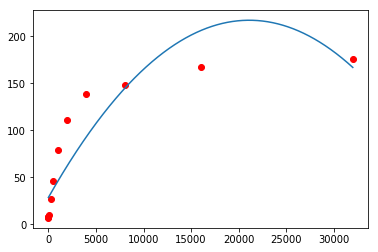

In [5]:
plot(fluorometry_measurement_standard)

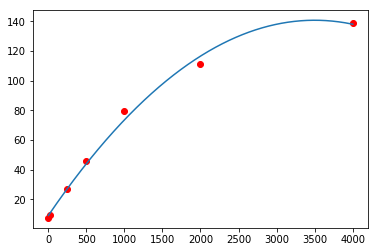

In [6]:
#I deleted 3 last points because of small precision
#I deleted 3 samlles points are undistingusiable - ai need delete them

fluorometry_measurement_standard_minus_3_last_minus_3_first = {
"concentration [ng/ul]": [4000, 2000, 1000, 500, 250, 25, 2.5],
"fluorescence [RFU]" : [139.03, 111.44, 79.572, 46.053, 26.756, 9.490, 7.563]
}

plot(fluorometry_measurement_standard_minus_3_last_minus_3_first)

In [7]:
#detection range od PicoGreen is 2.5 ng/ml up for 4000 ng/ml

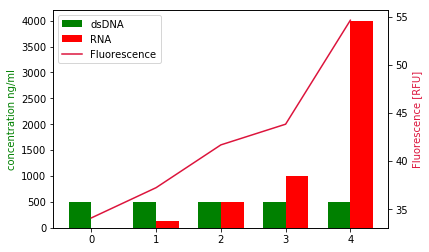

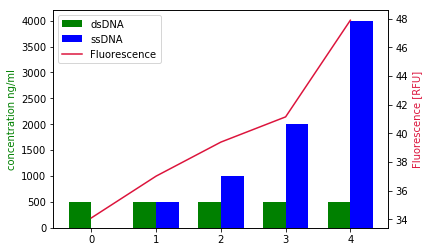

In [8]:
%run ../../functions.ipynb


specifity_assay_rna = {
"concentration [ng/ul]": [500, 500, 500, 500, 500],
"fluorescence [RFU]" : [37.239, 34.095, 41.686, 43.838, 37.010]  
}
picogreen_rna = double_bar_and_plot(
                ('dsDNA', [500, 500, 500, 500, 500]),
                ('RNA', [0, 250/2, 500, 1000, 4000]),
                ('Fluorescence', [34.095, 37.239, 41.686, 43.838, 54.643]), d1color="green", d2color="red")

picogreen = double_bar_and_plot(
                ('dsDNA', [500, 500, 500, 500, 500]),
                ('ssDNA', [0, 500, 1000, 2000, 4000]),
                ("Fluorescence", [34.095, 37.010, 39.384, 41.144, 47.886]), d1color="green", d2color="blue" )

In [16]:

name = "PicoGreen"
control = [{"name": "dsDNA",
        "fluorescences": [35.694, 37.546, 33.638]}]
        
data = [{"name": "dsDNA + RNA",
        "fluorescences": [39.195, 37.738, 42.495]},
        {"name": "dsDNA + ssDNA",
        "fluorescences": [28.496, 27.263, 25.015]},
        {"name": "dsDNA + protein",
        "fluorescences": [31.322, 29.681, 28.740]}]

results = specificity_assay(control, data, name)
results 

,average,cv,fluorescences,name,standard_deviation,unspecificity,specificity,fluorochrome
0,39.809333,0.049989,"[39.195, 37.738, 42.495]",dsDNA + RNA,1.990028,11.742360,88.257640,PicoGreen
1,26.924667,0.053524,"[28.496, 27.263, 25.015]",dsDNA + ssDNA,1.441109,24.424110,75.575890,PicoGreen
2,29.914333,0.035666,"[31.322, 29.681, 28.74]",dsDNA + protein,1.066932,16.032299,83.967701,PicoGreen


In [17]:
control

[{'average': 35.626000000000005,
  'cv': 0.04480319772823956,
  'fluorescences': [35.694, 37.546, 33.638],
  'name': 'dsDNA',
  'standard_deviation': 1.5961587222662628}]

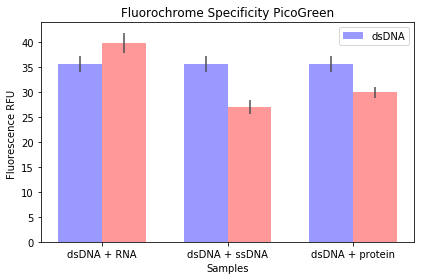

In [18]:
double_bar_graph((np.repeat(control[0]["average"], 3)),
                 results["average"],
                 results["name"],
                 sd_1=(np.repeat(control[0]["standard_deviation"], 3)),
                 sd_2=results["standard_deviation"].values,
                 xlabel="Samples", ylabel="Fluorescence RFU ", title=("Fluorochrome Specificity "+ str(name)),
                legend_1="dsDNA", legend_2="" )

In [19]:
picogreen_specificity = np.array(results["specificity"])
picogreen_specificity_average = average(np.array(results["specificity"]))
picogreen_specificity

array([88.25763955, 75.57589027, 83.96770149])

In [21]:
picogreen_specificity_average

lod(blank)

blank standard deviation: 0.12704526752303685
blank average: 6.838
detection limit: 7.21913580256911


(0.12704526752303685, 6.838, 7.21913580256911)

In [ ]:
picogreen_specificity_average = 82.60041043682205
picogreen_specificity = [88.25763955, 75.57589027, 83.96770149]